In [1]:
from collections import Counter
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Analysis

In [2]:
dir_path = "../data/hallusion_bench/"
dataset_path = dir_path + 'hallusion_bench_raw.json'

with open(dataset_path, 'r') as f:
    dataset = json.load(f)
df = pd.DataFrame(dataset)
print(f"Length of the dataset: {len(df)}")
df.head()

Length of the dataset: 1129


,category,subcategory,visual_input,set_id,figure_id,sample_note,question_id,question,gt_answer_details,gt_answer,filename
0,VS,chart,0,0,0,import,0,"Is China, Hongkong SAR, the leading importing ...",Switzerland is the leading importing country o...,0,None
1,VS,chart,0,0,0,import,1,"Is Switzerland, the leading importing country ...",Switzerland is the leading importing country o...,1,None
2,VS,chart,0,0,0,import,2,"Is France, the leading importing country of go...",Switzerland is the leading importing country o...,0,None
3,VS,chart,0,0,0,import,3,"Is the United States, the leading importing co...",Switzerland is the leading importing country o...,0,None
4,VS,chart,1,0,1,import,0,"Is China, Hongkong SAR, the leading importing ...",Switzerland is the leading importing country o...,0,./VS/chart/0_1.png


In [3]:
category_counts = Counter([data["category"] for data in dataset])
gt_answer_counts = Counter([data["gt_answer"] for data in dataset])
print(f"Category counter: {dict(category_counts)}")
print(f"GT answer counter: {dict(gt_answer_counts)}")

Category counter: {'VS': 538, 'VD': 591}
GT answer counter: {'0': 645, '1': 484}


gt_answer_details lengths mean: 57.41
gt_answer_details lengths median: 49.0
gt_answer_details lengths q1: 35.0
gt_answer_details lengths q3: 73.0


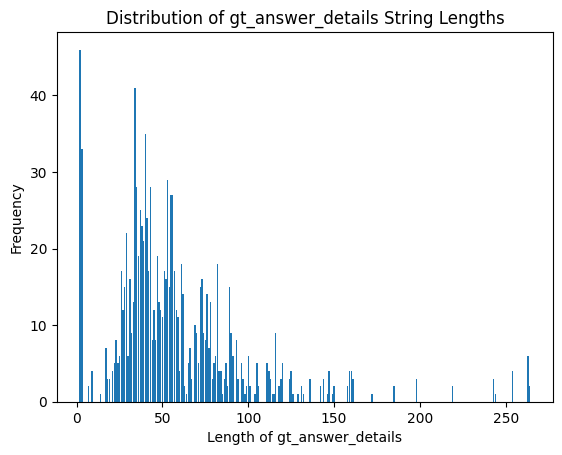

In [4]:
gt_answer_details_lengths = [len(data['gt_answer_details']) for data in dataset]
gt_answer_details_counts = Counter(gt_answer_details_lengths)

print(f"gt_answer_details lengths mean: {round(np.mean(gt_answer_details_lengths), 2)}")
print(f"gt_answer_details lengths median: {round(np.median(gt_answer_details_lengths), 2)}")
print(f"gt_answer_details lengths q1: {round(np.quantile(gt_answer_details_lengths, 0.25), 2)}")
print(f"gt_answer_details lengths q3: {round(np.quantile(gt_answer_details_lengths, 0.75), 2)}")

plt.figure()
plt.bar(gt_answer_details_counts.keys(), gt_answer_details_counts.values())
plt.xlabel('Length of gt_answer_details')
plt.ylabel('Frequency')
plt.title('Distribution of gt_answer_details String Lengths')
plt.show()

## Dataset Construction

In [5]:
q1 = np.quantile([len(data['gt_answer_details']) for data in dataset], 0.25)

df_filtered = df[df['gt_answer_details'].str.len() > q1]
df_filtered = df_filtered[df_filtered['visual_input'] != '0']
print(f"Length of the filtered dataset: {len(df_filtered)}")
df_filtered.head()

Length of the filtered dataset: 665


,category,subcategory,visual_input,set_id,figure_id,sample_note,question_id,question,gt_answer_details,gt_answer,filename
4,VS,chart,1,0,1,import,0,"Is China, Hongkong SAR, the leading importing ...",Switzerland is the leading importing country o...,0,./VS/chart/0_1.png
5,VS,chart,1,0,1,import,1,"Is Switzerland, the leading importing country ...",Switzerland is the leading importing country o...,1,./VS/chart/0_1.png
6,VS,chart,1,0,1,import,2,"Is France, the leading importing country of go...",Switzerland is the leading importing country o...,0,./VS/chart/0_1.png
7,VS,chart,1,0,1,import,3,"Is the United States, the leading importing co...",Switzerland is the leading importing country o...,0,./VS/chart/0_1.png
17,VS,chart,1,1,1,export,1,"From 2001 to 2019, Is 2019 exported the most v...","2019 is exported the most value of bread, bisc...",1,./VS/chart/1_1.png


In [6]:
category_counts = Counter(df_filtered['category'])
gt_answer_counts = Counter(df_filtered['gt_answer'])
print(f"Category counter: {dict(category_counts)}")
print(f"GT answer counter: {dict(gt_answer_counts)}")

Category counter: {'VS': 311, 'VD': 354}
GT answer counter: {'0': 383, '1': 282}


In [7]:
stratify_cols = ['gt_answer', 'category']
df_sample = (df_filtered
             .groupby(stratify_cols, group_keys=False)
             .apply(lambda x: x.sample(n=min(125, len(x)), random_state=42), include_groups=True)
             .reset_index(drop=True))

print(f'Shape: {df_sample.shape}')
print(f'gt_answer: {df_sample['gt_answer'].value_counts(normalize=True).round(3)}')
print(f'category: {df_sample['category'].value_counts(normalize=True).round(3)}')
print(f'subcategory: {df_sample['subcategory'].value_counts(normalize=True).round(3)}')
df_sample = df_sample.reset_index().rename(columns={'index': 'id'})
df_sample.head()

Shape: (500, 11)
gt_answer: gt_answer
0    0.5
1    0.5
Name: proportion, dtype: float64
category: category
VD    0.5
VS    0.5
Name: proportion, dtype: float64
subcategory: subcategory
chart       0.206
illusion    0.184
ocr         0.164
table       0.134
figure      0.098
map         0.076
video       0.072
math        0.066
Name: proportion, dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24480\1316538364.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(125, len(x)), random_state=42), include_groups=True)


,id,category,subcategory,visual_input,set_id,figure_id,sample_note,question_id,question,gt_answer_details,gt_answer,filename
0,0,VD,illusion,2,3,1,rail,1,Is the top yellow line longer than the bottom ...,The top yellow line is shorter than the bottom...,0,./VD/illusion/3_1.png
1,1,VD,illusion,1,2,0,line,1,Is the top line shorter than the bottom line?,The top line is the same size as the bottom line.,0,./VD/illusion/2_0.png
2,2,VD,math,2,12,1,math_prob,2,"If BE ⊥ AC, CD ⊥ AB, AF ⊥ BC, then is M the ci...",M is a random point inside of triangle ABC.,0,./VD/math/12_1.png
3,3,VD,ocr,2,16,1,Ben and Jerry,1,"According to the text given in the image, is t...","No, this is ice-cream a strawberry flavor ice ...",0,./VD/ocr/16_1.png
4,4,VD,illusion,1,29,0,line,1,Is the vertical line longer than the horizonta...,"No, the lengths of the vertical line and the h...",0,./VD/illusion/29_0.png


In [8]:
output = df_sample.to_dict('records')
with open(dir_path + "hallusion_bench_long_answer.json", "w") as f:
    json.dump(output, f, indent=4)